In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as ppt


## 1. Split the test features and label

In [2]:
heart_diseases_data=pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/refs/heads/master/data/heart-disease.csv")
heart_diseases_data.head()

X=heart_diseases_data.drop("target",axis=1)
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [3]:
Y= heart_diseases_data["target"];
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

** Split the data into test and training set

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [5]:
X_train.shape , X_test.shape , Y_train.shape, Y_test.shape

((242, 13), (61, 13), (242,), (61,))

## Making all value numerical 

In [6]:
car_sale_data=pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/refs/heads/master/data/car-sales-extended.csv");
car_sale_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [7]:
len(car_sale_data)

1000

In [8]:
car_sale_data.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [9]:
#split the data in train and test
X_car= car_sale_data.drop("Price",axis=1);
y_car= car_sale_data["Price"]


In [10]:
#split into training and test

X_car_train,X_car_test,y_car_train,y_car_test= train_test_split(X_car,y_car,test_size=0.2)

In [11]:
#convert categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer = ColumnTransformer([(
    "one_hot",
    one_hot,
    categorical_features
)],remainder="passthrough")

transformed_X =transformer.fit_transform(X_car);
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [12]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [13]:
dummies_data = pd.get_dummies(car_sale_data[["Make","Colour","Doors"]])

In [14]:

dummies_data.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False


In [15]:
# now fit it into the model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor();

X_c_train,X_c_test,Y_c_train,Y_c_test= train_test_split(transformed_X, y_car, test_size=0.2)

model.fit(X_c_train,y_car_train);
model


RandomForestRegressor()

In [16]:
model.score(X_c_test,Y_c_test)

-0.13830553284731195

## What if we have a missing values 

In [17]:
 car_sale_missing_data= pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/refs/heads/master/data/car-sales-extended-missing-data.csv");

car_sale_missing_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [18]:
car_sale_missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

## Option 1 : Fill using Pandas

In [19]:
car_sale_missing_data["Make"]=car_sale_missing_data["Make"].fillna("missing")
car_sale_data["Colour"]= car_sale_missing_data["Colour"].fillna("missing")
car_sale_missing_data["Odometer (KM)"]=car_sale_missing_data["Odometer (KM)"].fillna(car_sale_missing_data["Odometer (KM)"].mean() )
car_sale_missing_data["Doors"]=car_sale_missing_data["Doors"].fillna(4)

car_sale_missing_data.isna().sum()

Make              0
Colour           50
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [20]:
car_sale_missing_data = car_sale_missing_data.dropna()

In [21]:
len(car_sale_missing_data)

904

In [22]:
X=car_sale_missing_data.drop("Price",axis=1);
y=car_sale_missing_data["Price"]

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer = ColumnTransformer([(
    "one_hot",
    one_hot,
    categorical_features
)],remainder="passthrough")

transformed_X =transformer.fit_transform(car_sale_missing_data);
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [24]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
900,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0,5716.0
901,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
902,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0,4001.0


### Option 2 : With Sklearn

In [25]:
 car_sale_missing_data= pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/refs/heads/master/data/car-sales-extended-missing-data.csv");
car_sale_missing_data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [26]:
car_sale_missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [27]:
car_sale_missing_data.dropna(subset=["Price"],inplace=True)


In [28]:
X=car_sale_missing_data.drop("Price", axis=1)
y=car_sale_missing_data["Price"]

np.random.seed(42);
X_train, X_test , y_train,y_test= train_test_split(X,y,test_size=0.2)

In [29]:

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing");

door_imputer = SimpleImputer(strategy="constant" , fill_value=4)

num_imputer = SimpleImputer(strategy="mean")


In [30]:
cat_feature = ["Make", "Colour"];
door_feature = ["Doors"];
numerical_feature = ["Odometer (KM)"]

In [31]:
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer, cat_feature),
    ("door_imputer", door_imputer,door_feature),
    ("num_imputer",num_imputer,numerical_feature)
])

In [32]:
filled_X_train = imputer.fit_transform(X_train)
filled_X_test= imputer.fit_transform(X_test)

filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [33]:
filled_X_train_df= pd.DataFrame(filled_X_train, columns=["Make", "Colour","Doors","Odometer (KM)"])
filled_X_train_df.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

# Choosing the right algorithm for our problem 

In [34]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [35]:
housing_df= pd.DataFrame(housing_data["data"],columns=housing_data["feature_names"]);
housing_df["target"]=pd.Series(housing_data["target"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [36]:
len(housing_df)

20640

In [37]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=housing_df.drop("target",axis=1);
y=housing_df["target"]

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

In [38]:
model=Ridge()
forest_model=RandomForestRegressor()
model.fit(X_train,y_train)
forest_model.fit(X_train,y_train)
print(model.score(X_test,y_test))
forest_model.score(X_test,y_test)

0.5758549611440128


0.8065734772187598

# Choosing for Classification 

In [39]:
heart_diseases_data=pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/refs/heads/master/data/heart-disease.csv")
heart_diseases_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
from sklearn.svm import LinearSVC

In [41]:
np.random.seed(42)
X = heart_diseases_data.drop("target", axis=1)
y = heart_diseases_data["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
clf=LinearSVC(max_iter=1000, dual="auto")
clf.fit(X_train,y_train);

print(clf.score(X_test,y_test))
print(clf.score(X_train,y_train))

0.8688524590163934
0.8553719008264463


In [43]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8360655737704918

## 3. Fit the model on our data 

### 3.1 Fitting Model to Data

In [44]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_diseases_data.drop("target", axis=1)
y = heart_diseases_data["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

### 3.2 Making Prediction

In [45]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [46]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [47]:
y_preds = clf.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

In [49]:
clf.score(X_test,y_test)

0.8524590163934426

In [50]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [51]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [52]:
y_preds[:5]


array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  ])

In [53]:
np.array(y_test[:5])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   ])

In [54]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

# 4 . Evaluiating a machine learning model

In [55]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_diseases_data.drop("target", axis=1)
y = heart_diseases_data["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train);

### 4.1 With `score` method 

In [56]:
clf.score(X_train,y_train)

1.0

In [57]:
clf.score(X_test,y_test)

0.8524590163934426

In [58]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

In [59]:
model.score(X_test,y_test)

0.8065734772187598

### 4.2 Evaluation a model using the scoring parameter

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_diseases_data.drop("target", axis=1)
y = heart_diseases_data["target"]

clf = RandomForestClassifier(n_estimators=100)

In [61]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [62]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


### 4.1 Classificaion model evaluation metrics

### Accuray

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_diseases_data.drop("target", axis=1)
y = heart_diseases_data["target"]

clf = RandomForestClassifier(n_estimators=100)

In [64]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [65]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


**Area under the receiver operating characterstics curve (AUC/ROC)**

In [66]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2);

In [67]:
from sklearn.metrics import roc_curve

clf.fit(X_train,y_train);
y_probs= clf.predict_proba(X_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [68]:
y_probs_postive= y_probs[:,1]
y_probs_postive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [69]:
fpr,tpr,thresholds= roc_curve(y_test,y_probs_postive)

fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

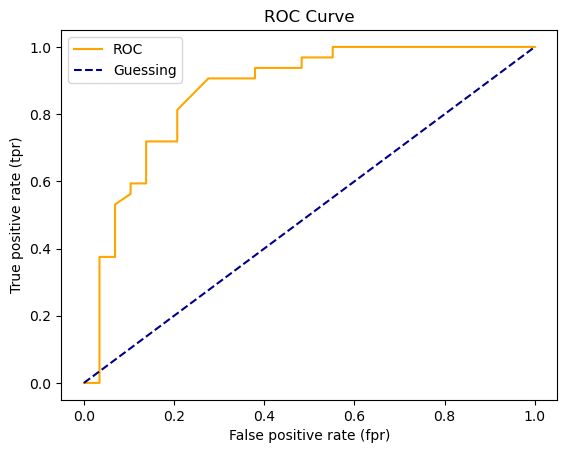

In [70]:
 # create a function for plotting ROC  curves
import matplotlib.pyplot as  plt

def plot_roc_curve(fpr,trp):
    plt.plot(fpr,tpr,color="orange",label="ROC");
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    plt.xlabel("False positive rate (fpr)");
    plt.ylabel("True positive rate (tpr)");
    plt.title("ROC Curve")
    plt.legend();
    plt.show()


plot_roc_curve(fpr,tpr);

In [71]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_postive)

0.8669181034482759

**Confusion Matrix**

In [72]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(X_test);
confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [73]:
pd.crosstab(y_test,y_preds,rownames=["Actual Labels"],colnames=["Predicted lables"])

Predicted lables,0,1
Actual Labels,,
0,23,6
1,6,26


<Axes: >

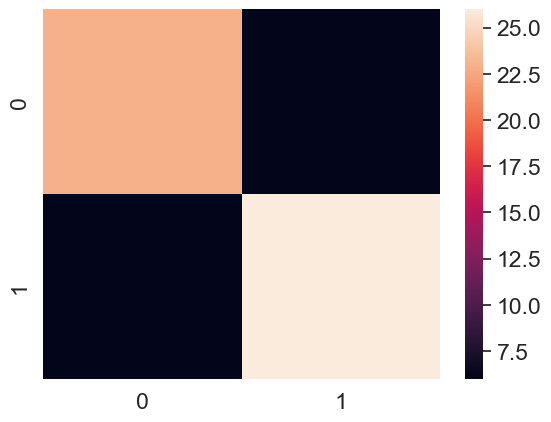

In [74]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat= confusion_matrix(y_test,y_preds);

sns.heatmap(conf_mat)

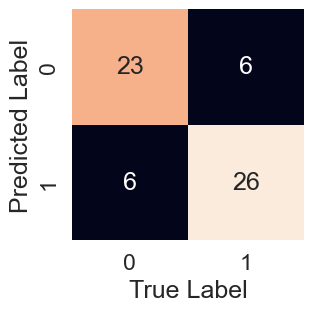

In [75]:
def plot_conf_mat(conf_mat):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,
                  annot=True,
                  cbar=False)
    plt.xlabel("True Label");
    plt.ylabel("Predicted Label");

plot_conf_mat(conf_mat)

*Classification Report*

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

